In [265]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Load metrics from results and save as single file.

In [266]:
metrics_path = 'metrics.csv'
results_folder = os.path.join('..' , '..', 'results')

In [267]:
df = pd.DataFrame()
for root, subdirs, files in os.walk(results_folder):
    for f in files:
        if f == 'metrics.csv':
            df = df.append(pd.read_csv(os.path.join(root,f)))
df = df.drop(columns=['Unnamed: 0']).reset_index(drop=True)
df.to_csv(metrics_path, index=False)

Load file for analysis

In [277]:
df = pd.read_csv(metrics_path)
df.round(3)

,accuracy,f1,precision,recall,model,dataset_type,dataset_size
0,0.950,0.907,0.911,0.903,bert-base-multilingual-uncased,all,large
1,0.936,0.878,0.918,0.842,bert-base-multilingual-uncased,all,medium
2,0.925,0.862,0.864,0.860,bert-base-multilingual-uncased,all,small
3,0.962,0.927,0.964,0.893,bert-base-multilingual-uncased,chemia,large
4,0.949,0.908,0.896,0.920,bert-base-multilingual-uncased,chemia,medium
5,0.925,0.853,0.922,0.793,bert-base-multilingual-uncased,chemia,small
6,0.941,0.901,0.829,0.987,bert-base-multilingual-uncased,napoje,large
7,0.938,0.885,0.897,0.873,bert-base-multilingual-uncased,napoje,medium
8,0.921,0.855,0.854,0.857,bert-base-multilingual-uncased,napoje,small
9,0.955,0.920,0.904,0.937,xlm-roberta-base,all,large


## Plots

In [269]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)

In [270]:
def encode_size(s):
    if s=='large':
        return 7
    elif s=='medium':
        return 3
    else:
        return 1


In [271]:
df['size'] = df['dataset_size'].apply(encode_size)

In [272]:
metrics_df = df[['f1', 'precision', 'recall']].melt(ignore_index=False, var_name='metric')
info_df = df[['model', 'size', 'dataset_size', 'dataset_type']]
metrics_info_df = metrics_df.merge(info_df, left_index=True, right_index=True)

In [273]:
def plot_f1_prec_rec_for_model(data, model, model_label):
    f = (metrics_info_df['model']==model) 
    d = metrics_info_df[f].sort_values(by='size', ascending=False)
    g = sns.FacetGrid(d, col="metric", hue='dataset_type', height=3.5)
    g.map(sns.lineplot, 'size', 'value', legend=None)
    g.map(sns.scatterplot, 'size', 'value')
    g.set(xticks=[1,3,7])
    g.set(xticklabels=['small', 'medium', 'large'])
    g.add_legend(title='Dataset type', loc="lower center", bbox_to_anchor=(0.4,-0.2), ncol=d['metric'].nunique())
    plt.savefig(f'img/{model_label}_metrics.svg', bbox_inches = 'tight', pad_inches = 0)
    plt.show()

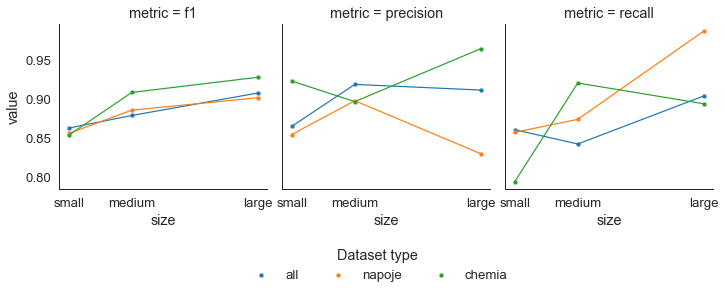

In [274]:
plot_f1_prec_rec_for_model(df,'bert-base-multilingual-uncased', 'bert')

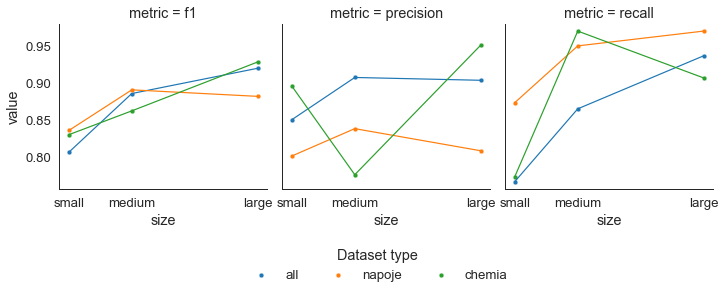

In [275]:
plot_f1_prec_rec_for_model(df, 'xlm-roberta-base', 'XLM-RoBERTa')